In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.font_manager import FontProperties
from matplotlib.collections import LineCollection
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

C:\Users\86152\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\86152\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [109]:
# # 指定输入Excel文件路径
# excel_path = '假设检验数据.xlsx'

# # 指定输出CSV文件路径
# output_csv_path = '假设检验.csv'

# # 使用pandas的read_excel函数读取数据
# df = pd.read_excel(excel_path)

# # 计算平均值的列
# columns_to_average = ['树脂含量', '固化温度', '碱减量程度', '断裂强力', '断裂伸长率', '撕裂强力', '透气率', '透湿率', '柔软度', '急弹角度']

# # 按照实验号分组并计算每组的平均值
# average_values = df.groupby('试验号')[columns_to_average].mean()

# average_values.to_csv(output_csv_path, index_label='试验号', sep=',', encoding='gbk')

# print(f"计算结果已保存到 {output_csv_path}")

In [110]:
# # 标准化
# from scipy.stats import zscore

# # 读取CSV文件
# df = pd.read_csv('ml.csv') 

# # 选择需要进行Z得分归一化的列
# # 假设我们对除了天气情况外的所有列进行归一化
# columns_to_normalize = ['x1', 'x2', 'x3', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7']

# # 对这些列应用Z得分归一化
# for column in columns_to_normalize:
#     df[column] = zscore(df[column])


# # 如果需要将归一化后的表格保存为新的CSV文件
# df.to_csv('normalized.csv', index=False)

In [6]:
df_normalized = pd.read_csv('ml.csv')
x1_mean = df_normalized['x1'].mean()
x1_std = df_normalized['x1'].std()
print(x1_mean, x1_std)
x2_mean = df_normalized['x2'].mean()
x2_std = df_normalized['x2'].std()
x3_mean = df_normalized['x3'].mean()
x3_std = df_normalized['x3'].std()
# y1_mean = df_normalized['y1'].mean()
# y1_std = df_normalized['y1'].std()
# y2_mean = df_normalized['y2'].mean()
# y2_std = df_normalized['y2'].std()
# y3_mean = df_normalized['y3'].mean()
# y3_std = df_normalized['y3'].std()
# y4_mean = df_normalized['y4'].mean()
# y4_std = df_normalized['y4'].std()
# y5_mean = df_normalized['y5'].mean()
# y5_std = df_normalized['y5'].std()
# y6_mean = df_normalized['y6'].mean()
# y6_std = df_normalized['y6'].std()
# y7_mean = df_normalized['y7'].mean()
# y7_std = df_normalized['y7'].std()

22.5 5.773502691896258


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from xgboost import XGBRegressor
from pyswarm import pso

def load_and_preprocess_data(file_path, target_column, features):
    df = pd.read_csv(file_path, encoding='gbk')
    X = df[features]
    y = df[target_column]
    return X, y


def optimize_with_pso(xgb, lb, ub, swarmsize, maxiter):
    def objective_function(x):
        X = np.array([[x[0], x[1], x[2]]])
        prediction = xgb.predict(X)
        return -prediction[0]
    
    result, f_val = pso(objective_function, lb, ub, swarmsize=swarmsize, maxiter=maxiter)
    return result, -f_val

def xgb_train(X_train, y_train):
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    return xgb

# 使用示例
file_path = 'normalized.csv'
features = ['x1', 'x2', 'x3']
target_columns = ['y8', 'y9', 'y10','y11']

for target in target_columns:
    X, y = load_and_preprocess_data(file_path, target, features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # train_and_evaluate_model(X_train, y_train, X_test, y_test)
    # lb = [15, 100, 0]
    # ub = [30, 130, 0.3]
    lb = [-1.341640786, -1.341640786, -1.341640786]
    ub = [1.341640786, 1.341640786, 1.341640786]
    result, max_prediction = optimize_with_pso(xgb_train(X_train, y_train), lb, ub, 30, 100)
    # x1 = result[0]
    # x2 = result[1]
    # x3 = result[2]
    x1 = result[0] * x1_std + x1_mean
    x2 = result[1] * x2_std + x2_mean
    x3 = result[2] * x3_std + x3_mean
    print("最优的参数x1,x2,x3:",x1, x2, x3)
    print(f"对应的最大预测结果{target}: {max_prediction}")

Stopping search: maximum iterations reached --> 100
最优的参数x1,x2,x3: 23.907945028161354 113.20827593924596 0.004566478073523034
对应的最大预测结果y8: 1.660576581954956
Stopping search: maximum iterations reached --> 100
最优的参数x1,x2,x3: 15.673715105423891 101.73202269936938 0.12034527898668465
对应的最大预测结果y9: 1.0078632831573486
Stopping search: maximum iterations reached --> 100
最优的参数x1,x2,x3: 14.75403331047119 127.84152580783277 0.2760379925282611
对应的最大预测结果y10: 1.4128355979919434
Stopping search: maximum iterations reached --> 100
最优的参数x1,x2,x3: 17.944977101712364 104.72322628979096 -0.004919333790576186
对应的最大预测结果y11: 0.5049992203712463


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from xgboost import XGBRegressor
from pyswarm import pso

def load_and_preprocess_data(file_path, target_column, features):
    df = pd.read_csv(file_path, encoding='gbk')
    X = df[features]
    y = df[target_column]
    return X, y


def optimize_with_pso(xgb, lb, ub, swarmsize, maxiter):
    def objective_function(x):
        X = np.array([[x[0], x[1], x[2]]])
        prediction = xgb.predict(X)
        return -prediction[0]
    
    result, f_val = pso(objective_function, lb, ub, swarmsize=swarmsize, maxiter=maxiter)
    return result, -f_val

def xgb_train(X_train, y_train):
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    return xgb

# 使用示例
file_path = 'normalized.csv'
features = ['x1', 'x2', 'x3']
target_columns = ['y12']

for target in target_columns:
    X, y = load_and_preprocess_data(file_path, target, features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # train_and_evaluate_model(X_train, y_train, X_test, y_test)
    # lb = [15, 100, 0]
    # ub = [30, 130, 0.3]
    lb = [-1.341640786, -1.341640786, -1.341640786]
    ub = [1.341640786, 1.341640786, 1.341640786]
    result, max_prediction = optimize_with_pso(xgb_train(X_train, y_train), lb, ub, 30, 100)
    # x1 = result[0]
    # x2 = result[1]
    # x3 = result[2]
    x1 = result[0] * x1_std + x1_mean
    x2 = result[1] * x2_std + x2_mean
    x3 = result[2] * x3_std + x3_mean
    print("最优的参数x1,x2,x3:",x1, x2, x3)
    print(f"对应的最大预测结果{target}: {max_prediction}")

Stopping search: maximum iterations reached --> 100
最优的参数x1,x2,x3: 19.57011019593922 107.7543261666604 0.027248802879113798
对应的最大预测结果y12: 0.2786557078361511


In [132]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# import numpy as np
# from xgboost import XGBRegressor
# from pyswarm import pso

# def load_and_preprocess_data(file_path, target_column, features):
#     df = pd.read_csv(file_path, encoding='gbk')
#     X = df[features]
#     y = df[target_column]
#     return X, y

# # def train_and_evaluate_model(X_train, y_train, X_test, y_test):
# #     xgb = XGBRegressor()
# #     cross_val_r2 = cross_val_score(xgb, X_train, y_train, cv=10, scoring='r2').mean()
# #     print(f'Cross-Validation R-Squared: {cross_val_r2:.4f}')
    
# #     xgb.fit(X_train, y_train)
# #     y_pred = xgb.predict(X_test)
    
# #     r_squared = r2_score(y_test, y_pred)
# #     mse = mean_squared_error(y_test, y_pred)
# #     rmse = np.sqrt(mse)
# #     sse = np.sum((y_test - y_pred) ** 2)
# #     mae = mean_absolute_error(y_test, y_pred)
# #     adjusted_r2 = 1 - ((1 - r_squared) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
# #     mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
# #     print(f'R-Squared: {r_squared:.4f}')
# #     print(f'Adjusted R-Squared: {adjusted_r2:.4f}')
# #     print(f'Mean Squared Error (MSE): {mse:.4f}')
# #     print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
# #     print(f'Sum of Squared Errors (SSE): {sse:.4f}')
# #     print(f'Mean Absolute Error (MAE): {mae:.4f}')
# #     print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# def optimize_with_pso(xgb, lb, ub, swarmsize, maxiter):
#     def objective_function(x):
#         X = np.array([[x[0], x[1], x[2]]])
#         prediction = xgb.predict(X)
#         return -prediction[0]
    
#     result, f_val = pso(objective_function, lb, ub, swarmsize=swarmsize, maxiter=maxiter)
#     return result, -f_val

# def xgb_train(X_train, y_train):
#     xgb = XGBRegressor()
#     xgb.fit(X_train, y_train)
#     return xgb

# # 使用示例
# file_path = 'ml.csv'
# features = ['x1', 'x2', 'x3']
# target_columns = ['y1', 'y2', 'y3','y4','y5','y6','y7']

# for target in target_columns:
#     X, y = load_and_preprocess_data(file_path, target, features)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#     # train_and_evaluate_model(X_train, y_train, X_test, y_test)
#     lb = [15, 100, 0]
#     ub = [30, 130, 0.3]
#     result, max_prediction = optimize_with_pso(xgb_train(X_train, y_train), lb, ub, 30, 100)
#     print("最优的参数x1,x2,x3:",result[0], result[1], result[2])
#     print(f"对应的最大预测结果{target}: {max_prediction}")

Stopping search: maximum iterations reached --> 100
最优的参数x1,x2,x3: 23.984641415522695 104.55964029574903 0.006763576036212637
对应的最大预测结果y1: 1746.71728515625
Stopping search: maximum iterations reached --> 100
最优的参数x1,x2,x3: 24.828355481757846 107.36596018144922 0.025125782486357804
对应的最大预测结果y2: 1.08392333984375
Stopping search: maximum iterations reached --> 100
最优的参数x1,x2,x3: 24.078753819568323 115.76277042403319 0.01373235820980232
对应的最大预测结果y3: 151.33132934570312
Stopping search: maximum iterations reached --> 100
最优的参数x1,x2,x3: 18.531613194410582 100.40014390919337 0.11679501357730983
对应的最大预测结果y4: 328.34814453125
Stopping search: maximum iterations reached --> 100
最优的参数x1,x2,x3: 15.0 125.19263989067366 0.14525719416576746
对应的最大预测结果y5: 3010.59912109375
Stopping search: maximum iterations reached --> 100
最优的参数x1,x2,x3: 16.387810883872614 130.0 0.3
对应的最大预测结果y6: 3.4318578243255615
Stopping search: maximum iterations reached --> 100
最优的参数x1,x2,x3: 20.645465620717655 130.0 0.29324637438555

Iteration 10/100: Global Best Value = [0.0499996]
Iteration 20/100: Global Best Value = [0.04999997]
Iteration 30/100: Global Best Value = [0.05]
Iteration 40/100: Global Best Value = [0.05]
Iteration 50/100: Global Best Value = [0.05]
Iteration 60/100: Global Best Value = [0.05]
Iteration 70/100: Global Best Value = [0.05]
Iteration 80/100: Global Best Value = [0.05]
Iteration 90/100: Global Best Value = [0.05]
Iteration 100/100: Global Best Value = [0.05]


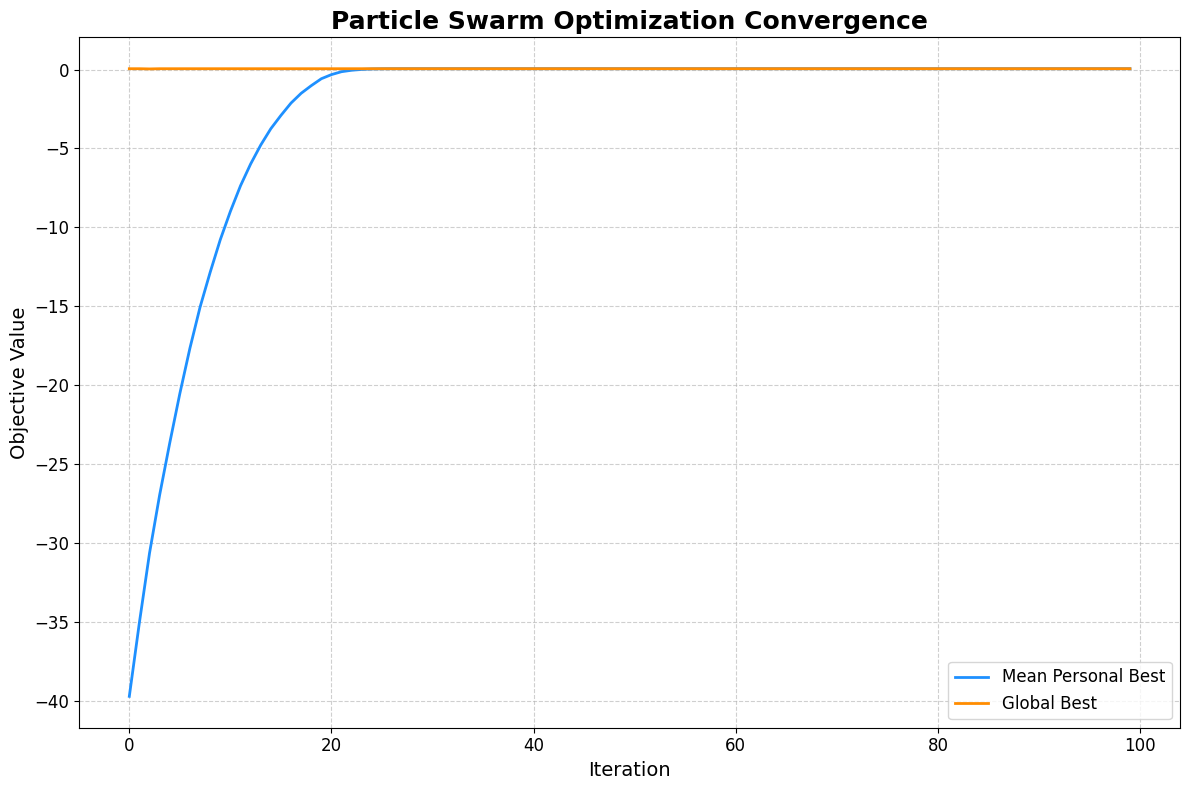

Optimal solution found at x = [2.5], with objective value = [0.05]


In [38]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # Define the objective function (we'll maximize this)
# def objective_function(x):
#     return -x**2 + 5*x - 5 + 1.10 - 2.3# Example function to maximize: -x^2 + 5x + 10

# # PSO function
# def pso(objective_function, num_particles, num_iterations, verbose=True):
#     # Initialize parameters
#     dim = 1  # Dimensionality of problem (in this case, 1D)
#     max_velocity = 0.5  # Maximum particle velocity adjustment
#     inertia_weight = 0.5  # Inertia weight
#     cognitive_weight = 0.5  # Cognitive weight (self-best)
#     social_weight = 0.5  # Social weight (global best)

#     # Initialize particles
#     particles_position = np.random.uniform(-10, 10, (num_particles, dim))
#     particles_velocity = np.random.uniform(-1, 1, (num_particles, dim))
#     particles_best_position = particles_position.copy()
#     particles_best_value = objective_function(particles_position)

#     global_best_index = np.argmax(particles_best_value)
#     global_best_position = particles_best_position[global_best_index].copy()
#     global_best_value = particles_best_value[global_best_index]

#     # Initialize history lists for visualization
#     history_best_value = []
#     history_global_best_value = []

#     # Main loop
#     for iteration in range(num_iterations):
#         # Update particles
#         for i in range(num_particles):
#             # Update velocity
#             particles_velocity[i] = (inertia_weight * particles_velocity[i] +
#                                      cognitive_weight * np.random.rand() * (particles_best_position[i] - particles_position[i]) +
#                                      social_weight * np.random.rand() * (global_best_position - particles_position[i]))

#             # Apply velocity limits
#             particles_velocity[i] = np.clip(particles_velocity[i], -max_velocity, max_velocity)

#             # Update position
#             particles_position[i] += particles_velocity[i]

#             # Evaluate objective function
#             current_value = objective_function(particles_position[i])

#             # Update personal best
#             if current_value > particles_best_value[i]:
#                 particles_best_value[i] = current_value
#                 particles_best_position[i] = particles_position[i].copy()

#             # Update global best
#             if current_value > global_best_value:
#                 global_best_value = current_value
#                 global_best_position = particles_position[i].copy()

#         # Record history
#         history_best_value.append(np.mean(particles_best_value))
#         history_global_best_value.append(global_best_value)

#         # Print progress
#         if verbose and (iteration + 1) % 10 == 0:
#             print(f"Iteration {iteration + 1}/{num_iterations}: Global Best Value = {global_best_value}")

#     # Save data to CSV
#     data = {
#         'Iteration': np.arange(num_iterations),
#         'Mean Personal Best': history_best_value,
#         'Global Best': history_global_best_value
#     }
#     df = pd.DataFrame(data)
#     df.to_csv('pso2.csv', index=False)

#     # Plot the convergence
#     plt.figure(figsize=(12, 8))
#     plt.plot(history_best_value, label='Mean Personal Best', color='dodgerblue', linewidth=2)
#     plt.plot(history_global_best_value, label='Global Best', color='darkorange', linewidth=2)
    
#     # Beautify the plot
#     plt.title('Particle Swarm Optimization Convergence', fontsize=18, fontweight='bold')
#     plt.xlabel('Iteration', fontsize=14)
#     plt.ylabel('Objective Value', fontsize=14)
#     plt.legend(fontsize=12)
#     plt.grid(True, linestyle='--', alpha=0.6)
#     plt.xticks(fontsize=12)
#     plt.yticks(fontsize=12)
#     plt.tight_layout()

#     # Show plot
#     plt.show()

#     # Return global best position and value
#     return global_best_position, global_best_value

# # Parameters
# num_particles = 20
# num_iterations = 100

# # Run PSO
# best_position, best_value = pso(objective_function, num_particles, num_iterations)
# print(f"Optimal solution found at x = {best_position}, with objective value = {best_value}")


In [40]:
# import pandas as pd
# import glob

# # 获取所有CSV文件的列表
# csv_files = sorted(glob.glob('pso*.csv'))  # 假设CSV文件都在当前目录下，且文件名符合'pso*.csv'的模式

# # 读取所有CSV文件到DataFrame列表中，同时删除'Global Best'列
# dataframes = [pd.read_csv(file).drop(columns=['Global Best','Iteration']) for file in csv_files]

# # 横向合并所有的DataFrame
# merged_df = pd.concat(dataframes, axis=1)

# # 查看合并后的DataFrame
# print(merged_df.head())

# # 如果需要将合并后的DataFrame保存为新的CSV文件
# merged_df.to_csv('merged_pso_without_global_best.csv', index=False)

   loop           y1  Mean Personal Best  Mean Personal Best  \
0     1  1722.483931          -29.965402          -18.327729   
1     2  1727.433177          -25.855256          -15.303085   
2     3  1731.999665          -22.159131          -12.518955   
3     4  1736.151028          -18.833693           -9.741386   
4     5  1739.974130          -15.950910           -7.376236   

   Mean Personal Best  Mean Personal Best  Mean Personal Best  \
0          -30.279749          -37.281554          149.595438   
1          -25.701689          -32.621119          153.670091   
2          -21.492444          -28.309168          157.376121   
3          -17.627341          -24.393308          160.700529   
4          -14.268698          -20.949258          163.445936   

   Mean Personal Best  Mean Personal Best  Mean Personal Best  \
0          273.970495         3496.667134          -26.279148   
1          279.771533         3501.032534          -22.099879   
2          285.553477        